# Traitement des dataframes et nettoyage des données

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Dataset 2019

In [2]:
data_2019 = pd.read_csv('../raw_data/ped_data_2019.csv')

In [3]:
data_2019

,Time,O'Connell St Outside Pennys,O'Connell St Outside Clerys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dawson Street Replacement,...,"College Green, Bank Of Ireland",Henry Street,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,01-01-2019 00:00:00,244,1914.0,20,16,NaN,NaN,NaN,NaN,NaN,...,NaN,95.0,1670.0,255.0,881.0,1988.0,140.0,NaN,NaN,NaN
1,01-01-2019 00:15:00,454,NaN,24,62,NaN,NaN,NaN,NaN,NaN,...,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2019 00:30:00,391,NaN,69,99,NaN,NaN,NaN,NaN,NaN,...,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2019 00:45:00,415,NaN,50,61,NaN,NaN,NaN,NaN,NaN,...,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2019 01:00:00,319,885.0,24,47,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,767.0,209.0,723.0,1270.0,215.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,31-12-2019 22:45:00,389,NaN,13,38,797.0,782.0,52.0,173.0,6.0,...,283.0,NaN,NaN,NaN,NaN,NaN,NaN,303.0,280.0,221.0
35032,31-12-2019 23:00:00,324,1967.0,18,39,914.0,743.0,48.0,220.0,1.0,...,287.0,NaN,1217.0,NaN,936.0,2898.0,1220.0,278.0,256.0,212.0
35033,31-12-2019 23:15:00,306,NaN,19,69,724.0,821.0,38.0,241.0,4.0,...,266.0,NaN,NaN,NaN,NaN,NaN,NaN,278.0,249.0,287.0
35034,31-12-2019 23:30:00,249,NaN,11,69,971.0,795.0,69.0,357.0,5.0,...,302.0,NaN,NaN,NaN,NaN,NaN,NaN,403.0,319.0,207.0


##  Je splite le dataframe 2019 pour traiter les données horaires uniquement.

In [4]:
data_2019_cleaned = data_2019.loc[:,['Time','O\'Connell St Outside Clerys', 'Dawson Street Replacement', 'Westmoreland Street East', 'Dawson Street',\
'Liffey Street', 'Westmoreland Street West', 'Grafton Street']]

In [5]:
data_2019_cleaned

,Time,O'Connell St Outside Clerys,Dawson Street Replacement,Westmoreland Street East,Dawson Street,Liffey Street,Westmoreland Street West,Grafton Street
0,01-01-2019 00:00:00,1914.0,NaN,1670.0,255.0,881.0,1988.0,140.0
1,01-01-2019 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-01-2019 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-01-2019 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-01-2019 01:00:00,885.0,NaN,767.0,209.0,723.0,1270.0,215.0
...,...,...,...,...,...,...,...,...
35031,31-12-2019 22:45:00,NaN,6.0,NaN,NaN,NaN,NaN,NaN
35032,31-12-2019 23:00:00,1967.0,1.0,1217.0,NaN,936.0,2898.0,1220.0
35033,31-12-2019 23:15:00,NaN,4.0,NaN,NaN,NaN,NaN,NaN
35034,31-12-2019 23:30:00,NaN,5.0,NaN,NaN,NaN,NaN,NaN


### Concaténation de la colonne Dawson Street pour un capteur remplacé

In [6]:
data_2019_cleaned['Dawson total']=\
pd.concat([data_2019_cleaned['Dawson Street'].iloc[:30000],\
           data_2019_cleaned['Dawson Street Replacement'].iloc[30000:]])

In [7]:
data_2019_cleaned = data_2019_cleaned.drop(columns=['Dawson Street','Dawson Street Replacement'])

In [8]:
# Je renomme Dawson Street
data_2019_cleaned = data_2019_cleaned.rename(columns = {'Dawson total' : 'Dawson Street'})

### On ne garde que les comptage horaires

In [9]:
for i in range(data_2019_cleaned.shape[0]):
    if i%4 != 0 :
        data_2019_cleaned = data_2019_cleaned.drop(index = i)

In [10]:
data_2019_cleaned = data_2019_cleaned.reset_index(drop=True)

In [11]:
data_2019_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         8759 non-null   object 
 1   O'Connell St Outside Clerys  8759 non-null   float64
 2   Westmoreland Street East     8759 non-null   float64
 3   Liffey Street                8759 non-null   float64
 4   Westmoreland Street West     8759 non-null   float64
 5   Grafton Street               8759 non-null   float64
 6   Dawson Street                7607 non-null   float64
dtypes: float64(6), object(1)
memory usage: 479.1+ KB


Il reste toujours à combler la colonne Dawson Street

## Je passe au reste du dataframe 2019

In [16]:
data_2019_rest = data_2019.drop(columns=['Time','O\'Connell St Outside Clerys', 'Dawson Street Replacement', 'Westmoreland Street East', 'Dawson Street',\
'Liffey Street', 'Westmoreland Street West', 'Grafton Street'])

In [17]:
data_2019_rest

,O'Connell St Outside Pennys,Mary Street,Capel Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,244,20,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN
1,454,24,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,265.0,NaN,NaN,NaN
2,391,69,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,NaN,NaN,NaN
3,415,50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN,NaN,NaN
4,319,24,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35031,389,13,38,797.0,782.0,52.0,173.0,226.0,445.0,165.0,144.0,283.0,NaN,303.0,280.0,221.0
35032,324,18,39,914.0,743.0,48.0,220.0,274.0,353.0,124.0,110.0,287.0,NaN,278.0,256.0,212.0
35033,306,19,69,724.0,821.0,38.0,241.0,274.0,277.0,141.0,170.0,266.0,NaN,278.0,249.0,287.0
35034,249,11,69,971.0,795.0,69.0,357.0,383.0,348.0,110.0,116.0,302.0,NaN,403.0,319.0,207.0


In [18]:
data_2019_rest_recept = data_2019_rest

In [19]:
for column in data_2019_rest:
    for i in range(1,data_2019_rest.shape[0]):
        if i%4 == 0 :
            data_2019_rest_recept.loc[i, column] = sum(data_2019_rest.loc[i-3:i, column])

### J'enlève tout ce qui n'est pas un comptage horaire.

In [21]:
for i in range(data_2019_rest.shape[0]):
    if i%4 != 0 :
        data_2019_rest_recept = data_2019_rest_recept.drop(index = i)
    data_2019_rest_recept = data_2019_rest_recept

In [22]:
data_2019_rest_recept = data_2019_rest_recept.reset_index(drop=True)

In [23]:
data_2019_rest_recept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   O'Connell St Outside Pennys                      8759 non-null   int64  
 1   Mary Street                                      8759 non-null   int64  
 2   Capel Street                                     8759 non-null   int64  
 3   Aston Quay                                       7340 non-null   float64
 4   Grafton Street @ CompuB                          7390 non-null   float64
 5   Talbot Street North                              7346 non-null   float64
 6   Doilier Street, Burgh Quay                       7387 non-null   float64
 7   Dame Street                                      7390 non-null   float64
 8   Talbot Street South                              7382 non-null   float64
 9   O'Connell St, Parnell St @ AIB

## Je reforme le dataframe 2019

In [24]:
df2019_cleaned = pd.concat([data_2019_cleaned,data_2019_rest_recept], axis=1)

In [152]:
# Il manque un comptage à 01:00:00 le 31-03-2019

df2019_cleaned.iloc[2136:2138]

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson total,O'Connell St Outside Pennys,Mary Street,Capel Street,...,"Doilier Street, Burgh Quay",Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
2136,31-03-2019 00:00:00,495.0,431.0,434.0,841.0,941.0,333.0,795,78,196,...,1568.0,737.0,3004.0,389.0,353.0,1112.0,299.0,693.0,681.0,518.0
2137,31-03-2019 02:00:00,343.0,269.0,354.0,736.0,931.0,232.0,507,50,112,...,1356.0,539.0,3070.0,239.0,239.0,780.0,179.0,487.0,404.0,348.0


## Je remplis les valeurs manquantes

In [235]:
df2019_cleaned

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson Street,O'Connell St Outside Pennys,Mary Street,Capel Street,...,"Doilier Street, Burgh Quay",Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,01-01-2019 00:00:00,1914.0,1670.0,881.0,1988.0,140.0,255.0,244,20,16,...,NaN,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN
1,01-01-2019 01:00:00,885.0,767.0,723.0,1270.0,215.0,209.0,1579,167,269,...,NaN,NaN,NaN,NaN,NaN,NaN,592.0,NaN,NaN,NaN
2,01-01-2019 02:00:00,984.0,642.0,1010.0,1589.0,210.0,193.0,1164,85,149,...,NaN,NaN,NaN,NaN,NaN,NaN,349.0,NaN,NaN,NaN
3,01-01-2019 03:00:00,935.0,582.0,772.0,1534.0,204.0,178.0,1204,79,125,...,NaN,NaN,NaN,NaN,NaN,NaN,322.0,NaN,NaN,NaN
4,01-01-2019 04:00:00,390.0,143.0,197.0,610.0,88.0,35.0,1308,52,179,...,NaN,NaN,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,31-12-2019 19:00:00,1750.0,763.0,910.0,1929.0,1190.0,43.0,1634,236,331,...,278.0,1070.0,811.0,916.0,453.0,1026.0,NaN,1017.0,1040.0,803.0
8755,31-12-2019 20:00:00,1644.0,727.0,989.0,1984.0,1239.0,61.0,1571,226,324,...,352.0,1118.0,740.0,823.0,451.0,1027.0,NaN,1098.0,1115.0,1026.0
8756,31-12-2019 21:00:00,1554.0,752.0,779.0,2120.0,1314.0,6.0,1432,131,271,...,450.0,1194.0,990.0,628.0,384.0,1079.0,NaN,1203.0,984.0,767.0
8757,31-12-2019 22:00:00,1972.0,997.0,823.0,2461.0,1315.0,9.0,1415,86,218,...,492.0,1335.0,1434.0,509.0,424.0,1124.0,NaN,1358.0,903.0,750.0


In [407]:
df_test = df2019_cleaned.copy()

### Je retravaille les données temporelles pour sortir le cycle horaire journalier

In [408]:
# Je reprendrai cette stratégie pour les différentes colonnes des dataset suivants.
df_test['Time'] = pd.to_datetime(df_test['Time'])

In [409]:
# J'ajoute une colonne pour rassembler tous les comptages par heure

df_test['hour_cycle'] = 0
for i in range(df_test.shape[0]):
    df_test['hour_cycle'][i] = df_test['Time'][i].hour

/tmp/ipykernel_653/594255515.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['hour_cycle'][i] = df_test['Time'][i].hour


In [410]:
# pour mettre le cycle en index
df_test_1 = df_test.set_index('hour_cycle', drop=False)

### Test visuel pour vérifier la cohérence 

<AxesSubplot:xlabel='hour_cycle', ylabel='Henry Street'>

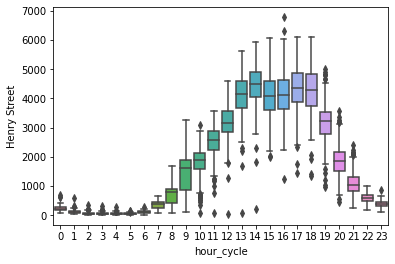

In [239]:
sns.boxplot(x='hour_cycle', y='Henry Street', data=df_test)

<AxesSubplot:xlabel='hour_cycle', ylabel='Dame Street'>

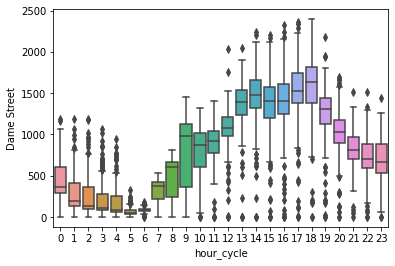

In [240]:
sns.boxplot(x='hour_cycle', y='Dame Street', data=df_test)

In [308]:
df_test['hour_cycle'].value_counts()

# Il manque un comptage à 01:00:00 le 31-03-2019
#df2019_cleaned.iloc[2136:2138]

0     365
13    365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
1     364
Name: hour_cycle, dtype: int64

In [411]:
df_test_1

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson Street,O'Connell St Outside Pennys,Mary Street,Capel Street,...,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side,hour_cycle
hour_cycle,,,,,,,,,,,,,,,,,,,,,
0,2019-01-01 00:00:00,1914.0,1670.0,881.0,1988.0,140.0,255.0,244,20,16,...,NaN,NaN,NaN,NaN,NaN,95.0,NaN,NaN,NaN,0
1,2019-01-01 01:00:00,885.0,767.0,723.0,1270.0,215.0,209.0,1579,167,269,...,NaN,NaN,NaN,NaN,NaN,592.0,NaN,NaN,NaN,1
2,2019-01-01 02:00:00,984.0,642.0,1010.0,1589.0,210.0,193.0,1164,85,149,...,NaN,NaN,NaN,NaN,NaN,349.0,NaN,NaN,NaN,2
3,2019-01-01 03:00:00,935.0,582.0,772.0,1534.0,204.0,178.0,1204,79,125,...,NaN,NaN,NaN,NaN,NaN,322.0,NaN,NaN,NaN,3
4,2019-01-01 04:00:00,390.0,143.0,197.0,610.0,88.0,35.0,1308,52,179,...,NaN,NaN,NaN,NaN,NaN,288.0,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,2019-12-31 19:00:00,1750.0,763.0,910.0,1929.0,1190.0,43.0,1634,236,331,...,1070.0,811.0,916.0,453.0,1026.0,NaN,1017.0,1040.0,803.0,19
20,2019-12-31 20:00:00,1644.0,727.0,989.0,1984.0,1239.0,61.0,1571,226,324,...,1118.0,740.0,823.0,451.0,1027.0,NaN,1098.0,1115.0,1026.0,20
21,2019-12-31 21:00:00,1554.0,752.0,779.0,2120.0,1314.0,6.0,1432,131,271,...,1194.0,990.0,628.0,384.0,1079.0,NaN,1203.0,984.0,767.0,21


### Travail sur les valeurs manquantes

In [412]:
# Je sors toutes les colonnes avec des valeurs manquantes
df_count = df_test_1[['Dame Street', 'Dawson Street', 'Aston Quay','Grafton Street @ CompuB','Talbot Street North',\
                     'Doilier Street, Burgh Quay','Talbot Street South',\
                     'O\'Connell St, Parnell St @ AIB','Grafton Street / Nassau Street / Suffolk Street',\
                     'College Green, Bank Of Ireland','Henry Street','Bachelors Walk',\
                     'College Green @ Church Lane','College Green - Dame St Side' ,'hour_cycle']]

In [413]:
# je les rassemble par heure, en virant les Nan
df_count = df_count.drop(columns='hour_cycle').dropna().groupby(by="hour_cycle").agg('median').reset_index(drop=False)

In [414]:
#J'obtiens la distribution médiane par heure pour chaque rue
df_count

,hour_cycle,Dame Street,Dawson Street,Aston Quay,Grafton Street @ CompuB,Talbot Street North,"Doilier Street, Burgh Quay",Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side
0,0,358.0,57.0,510.0,875.0,94.0,440.0,1832.0,244.0,166.0,434.0,218.0,260.0,328.0,258.0
1,1,181.5,24.0,234.0,421.0,51.5,148.5,2522.0,118.0,72.5,206.5,99.0,113.0,116.5,102.0
2,2,121.0,16.0,140.0,280.0,32.0,93.0,2435.0,68.0,40.0,141.0,55.0,68.0,62.0,53.0
3,3,108.0,11.0,110.0,254.0,22.0,195.0,1984.0,59.0,36.0,130.0,46.0,55.0,51.0,50.0
4,4,83.0,5.0,82.0,206.0,19.0,40.0,1588.0,44.0,20.0,118.0,47.0,46.0,36.0,23.0
5,5,48.0,12.0,46.0,139.0,17.0,18.0,1227.0,34.0,20.0,77.0,50.0,24.0,23.0,24.0
6,6,82.0,71.0,82.0,243.0,27.0,66.0,1154.0,79.0,39.0,112.0,126.0,40.0,67.0,81.0
7,7,394.0,233.0,367.0,998.0,87.0,414.0,1802.0,237.0,164.0,302.0,403.0,225.0,473.0,349.0
8,8,612.0,562.0,606.0,1704.0,190.0,711.0,2219.0,413.0,326.0,490.0,827.0,488.0,698.0,902.0
9,9,991.0,460.0,905.0,2315.0,253.0,948.0,1952.0,772.0,691.0,931.0,1665.0,699.0,1318.0,1765.0


In [415]:
column_list_2019 = ['Dame Street', 'Dawson Street', 'Aston Quay','Grafton Street @ CompuB','Talbot Street North',\
                     'Doilier Street, Burgh Quay','Talbot Street South',\
                     'O\'Connell St, Parnell St @ AIB','Grafton Street / Nassau Street / Suffolk Street',\
                     'College Green, Bank Of Ireland','Henry Street','Bachelors Walk',\
                     'College Green @ Church Lane','College Green - Dame St Side']

In [416]:
for column in column_list_2019 :

    mapping_2019 = df_count[column]

    df_test[column]=df_test[column].fillna(df_test['hour_cycle'].map(mapping_2019))

In [417]:
df_test.isnull().sum()

Time                                               0
O'Connell St Outside Clerys                        0
Westmoreland Street East                           0
Liffey Street                                      0
Westmoreland Street West                           0
Grafton Street                                     0
Dawson Street                                      0
O'Connell St Outside Pennys                        0
Mary Street                                        0
Capel Street                                       0
Aston Quay                                         0
Grafton Street @ CompuB                            0
Talbot Street North                                0
Doilier Street, Burgh Quay                         0
Dame Street                                        0
Talbot Street South                                0
O'Connell St, Parnell St @ AIB                     0
Grafton Street / Nassau Street / Suffolk Street    0
College Green, Bank Of Ireland                

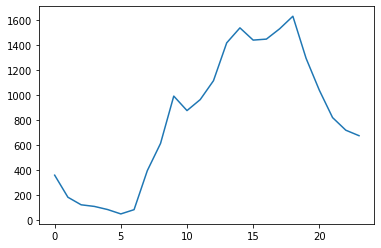

In [422]:
plt.plot(df_count['hour_cycle'], df_count['Dame Street'])

<AxesSubplot:xlabel='hour_cycle', ylabel='Dame Street'>

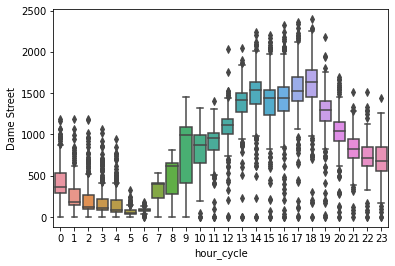

In [424]:
sns.boxplot(x=df_test['hour_cycle'], y=df_test['Dame Street'])

Liste des rues avec des valeurs manquantes :

Aston Quay                                         1419 <br>
Grafton Street @ CompuB                            1369<br>
Talbot Street North                                1413<br>
Doilier Street, Burgh Quay                         1372<br>
Dame Street                                        1369<br>
Talbot Street South                                1377<br>
O'Connell St, Parnell St @ AIB                     1851<br>
Grafton Street / Nassau Street / Suffolk Street    1369<br>
College Green, Bank Of Ireland                     1369<br>
Henry Street                                       1656<br>
Bachelors Walk                                     1522<br>
College Green @ Church Lane                        1516<br>
College Green - Dame St Side                       1516<br>

In [425]:
df_test

,Time,O'Connell St Outside Clerys,Westmoreland Street East,Liffey Street,Westmoreland Street West,Grafton Street,Dawson Street,O'Connell St Outside Pennys,Mary Street,Capel Street,...,Dame Street,Talbot Street South,"O'Connell St, Parnell St @ AIB",Grafton Street / Nassau Street / Suffolk Street,"College Green, Bank Of Ireland",Henry Street,Bachelors Walk,College Green @ Church Lane,College Green - Dame St Side,hour_cycle
0,2019-01-01 00:00:00,1914.0,1670.0,881.0,1988.0,140.0,255.0,244,20,16,...,358.0,1832.0,244.0,166.0,434.0,95.0,260.0,328.0,258.0,0
1,2019-01-01 01:00:00,885.0,767.0,723.0,1270.0,215.0,209.0,1579,167,269,...,181.5,2522.0,118.0,72.5,206.5,592.0,113.0,116.5,102.0,1
2,2019-01-01 02:00:00,984.0,642.0,1010.0,1589.0,210.0,193.0,1164,85,149,...,121.0,2435.0,68.0,40.0,141.0,349.0,68.0,62.0,53.0,2
3,2019-01-01 03:00:00,935.0,582.0,772.0,1534.0,204.0,178.0,1204,79,125,...,108.0,1984.0,59.0,36.0,130.0,322.0,55.0,51.0,50.0,3
4,2019-01-01 04:00:00,390.0,143.0,197.0,610.0,88.0,35.0,1308,52,179,...,83.0,1588.0,44.0,20.0,118.0,288.0,46.0,36.0,23.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2019-12-31 19:00:00,1750.0,763.0,910.0,1929.0,1190.0,43.0,1634,236,331,...,1070.0,811.0,916.0,453.0,1026.0,3358.0,1017.0,1040.0,803.0,19
8755,2019-12-31 20:00:00,1644.0,727.0,989.0,1984.0,1239.0,61.0,1571,226,324,...,1118.0,740.0,823.0,451.0,1027.0,1948.0,1098.0,1115.0,1026.0,20
8756,2019-12-31 21:00:00,1554.0,752.0,779.0,2120.0,1314.0,6.0,1432,131,271,...,1194.0,990.0,628.0,384.0,1079.0,1090.0,1203.0,984.0,767.0,21
8757,2019-12-31 22:00:00,1972.0,997.0,823.0,2461.0,1315.0,9.0,1415,86,218,...,1335.0,1434.0,509.0,424.0,1124.0,632.0,1358.0,903.0,750.0,22


# Dataset 2020

In [469]:
data_2020 = pd.read_csv('../raw_data/ped_data_2020.csv')

In [471]:
data_2020.isnull().sum()

Date & Time                                           0
Aston Quay                                            1
Bachelors Walk                                      100
Capel Street - Removed from site 20/10             1993
College Green - Dame St Side                          1
College Green @ Church Lane                           1
College Green, Bank Of Ireland                        1
Dame Street (Counter Missing)                      2887
Dawson Street Replacement                             1
Doilier Street, Burgh Quay                            1
Grafton Street                                     4587
Grafton Street / Nassau Street / Suffolk Street       1
Grafton Street @ CompuB                               1
Henry Street                                        853
Liffey Street                                         1
Mary Street                                        5353
O'Connell St Outside Clerys                           1
O'Connell St Outside Pennys                     

In [472]:
data_2020_cleaned = data_2020.copy()

In [473]:
# J'ajoute une colonne pour rassembler tous les comptages par heure
# Je reprendrai cette stratégie pour les différentes colonnes des dataset suivants.
data_2020_cleaned ['Date & Time'] = pd.to_datetime(data_2020_cleaned ['Date & Time'])
data_2020_cleaned ['hour_cycle'] = 0
for i in range(data_2020_cleaned.shape[0]):
    data_2020_cleaned['hour_cycle'][i] = data_2020_cleaned['Date & Time'][i].hour

/tmp/ipykernel_653/674762835.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2020_cleaned['hour_cycle'][i] = data_2020_cleaned['Date & Time'][i].hour


In [474]:
# 2020 est une année bisextile, donc 366 jours
data_2020_cleaned['hour_cycle'].value_counts()

0     366
1     366
22    366
21    366
20    366
19    366
18    366
17    366
16    366
15    366
14    366
13    366
12    366
11    366
10    366
9     366
8     366
7     366
6     366
5     366
4     366
3     366
2     366
23    366
Name: hour_cycle, dtype: int64

In [475]:
# pour mettre le cycle en index
data_2020_count = data_2020_cleaned.set_index('hour_cycle', drop=False)

In [476]:
# Je sors toutes les colonnes avec des valeurs manquantes
df_2020_count = data_2020_count[['Aston Quay', 'Bachelors Walk',
       'Capel Street - Removed from site 20/10',
       'College Green - Dame St Side', 'College Green @ Church Lane',
       'College Green, Bank Of Ireland', 'Dame Street (Counter Missing)',
       'Dawson Street Replacement', 'Doilier Street, Burgh Quay',
       'Grafton Street', 'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street @ CompuB', 'Henry Street', 'Liffey Street',
       'Mary Street', 'O\'Connell St Outside Clerys',
       'O\'Connell St Outside Pennys', 'O\'Connell St, Parnell St @ AIB',
       'Talbot Street North', 'Talbot Street South',
       'Westmoreland Street East', 'Westmoreland Street West', 'hour_cycle']]
# je les rassemble par heure, en virant les Nan
df_count_2020 = df_2020_count.drop(columns='hour_cycle').dropna().groupby(by="hour_cycle").agg('median').reset_index(drop=False)

In [477]:
column_list_2020 = ['Aston Quay', 'Bachelors Walk',
       'Capel Street - Removed from site 20/10',
       'College Green - Dame St Side', 'College Green @ Church Lane',
       'College Green, Bank Of Ireland', 'Dame Street (Counter Missing)',
       'Dawson Street Replacement', 'Doilier Street, Burgh Quay',
       'Grafton Street', 'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street @ CompuB', 'Henry Street', 'Liffey Street',
       'Mary Street', 'O\'Connell St Outside Clerys',
       'O\'Connell St Outside Pennys', 'O\'Connell St, Parnell St @ AIB',
       'Talbot Street North', 'Talbot Street South',
       'Westmoreland Street East', 'Westmoreland Street West']

In [478]:
for column in column_list_2020 :

    mapping_2020 = df_count_2020[column]

    data_2020_cleaned[column]=data_2020_cleaned[column].fillna(data_2020_cleaned['hour_cycle'].map(mapping_2020))

In [481]:
data_2020_cleaned.isnull().sum()

Date & Time                                        0
Aston Quay                                         0
Bachelors Walk                                     0
Capel Street - Removed from site 20/10             0
College Green - Dame St Side                       0
College Green @ Church Lane                        0
College Green, Bank Of Ireland                     0
Dame Street (Counter Missing)                      0
Dawson Street Replacement                          0
Doilier Street, Burgh Quay                         0
Grafton Street                                     0
Grafton Street / Nassau Street / Suffolk Street    0
Grafton Street @ CompuB                            0
Henry Street                                       0
Liffey Street                                      0
Mary Street                                        0
O'Connell St Outside Clerys                        0
O'Connell St Outside Pennys                        0
O'Connell St, Parnell St @ AIB                

# Dataset 2021

In [436]:
data_2021 = pd.read_csv('../raw_data/ped_data_2021.csv')

In [439]:
data_2021.columns

Index(['Date and Time', 'Aston Quay/Fitzgeralds',
       'Bachelors walk/Bachelors way', 'Baggot st lower/Wilton tce inbound',
       'Baggot st upper/Mespil rd/Bank', 'Capel st/Mary street',
       'College Green/Bank Of Ireland', 'College Green/Church Lane',
       'College st/Westmoreland st', 'D'olier st/Burgh Quay',
       'Dame Street/Londis', 'Dawson Street/Molesworth', 'Grafton st/Monsoon',
       'Grafton Street / Nassau Street / Suffolk Street',
       'Grafton Street/CompuB', 'Grand Canal st upp/Clanwilliam place',
       'Grand Canal st upp/Clanwilliam place/Google',
       'Henry Street/Coles Lane/Dunnes', 'Liffey st/Halfpenny Bridge',
       'Mary st/Jervis st', 'Newcomen Bridge/Charleville mall inbound',
       'Newcomen Bridge/Charleville mall outbound',
       'North Wall Quay/Samuel Beckett bridge East',
       'North Wall Quay/Samuel Beckett bridge West',
       'O'Connell St/Parnell St/AIB', 'O'Connell St/Pennys',
       'O'Connell st/Princes st North', 'Phibsboroug

In [441]:
data_2021['Mary st/Jervis st'].describe()

count     816.000000
mean      689.171569
std       769.088001
min         0.000000
25%        78.750000
50%       320.000000
75%      1274.250000
max      7303.000000
Name: Mary st/Jervis st, dtype: float64

# Liste des capteurs ajoutés en 2021 (à retirer ?)

2   Baggot st lower/Wilton tce inbound               5079 non-null   float64<br>
 3   Baggot st upper/Mespil rd/Bank <br>

 15  Grand Canal st upp/Clanwilliam place             5078 non-null   float64<br>
 16  Grand Canal st upp/Clanwilliam place/Google<br>

Newcomen Bridge/Charleville mall inbound         5075 non-null   float64<br>
 21  Newcomen Bridge/Charleville mall outbound        5074 non-null   float64<br>
 22  North Wall Quay/Samuel Beckett bridge East       5087 non-null   float64<br>
 23  North Wall Quay/Samuel Beckett bridge West <br>

27  Phibsborough Rd/Enniskerry Road                  5087 non-null   float64<br>
 28  Phibsborough Rd/Munster St                       798 non-null    float64<br>
 29  Richmond st south/Portabello Harbour inbound     5079 non-null   float64<br>
 30  Richmond st south/Portabello Harbour outbound<br>